# ***Содержание***
*   *1) Описание DataSet.*
*   *2) Импорт библиотек и загрузка DataSet.*
*   *3) EDA - Разведочный анализ данных.*
*   *4) Подготовка данных.*
*   *5) Построение и оценка качества Baseline, тестирование различных метрик.*
*   *6) Выбор метрики и обоснование.*







# ***1) Описание DataSet***

Датасет "Проблемы с сердцем"
Датасет имеет 13 критериев оценки:
1.   Age - возраст, в годах
2.   Sex - пол, 1:мужской, 0:женский
3.   ChestPain (cp) - боли в груди, 1:ангина 2:неподтверждённая ангина 3:другие причины боли 4:боли отсутствуют
4.  Restbps (trestbps) - артериальное давление в состоянии покоя, мм.рт.ст.
5.  Serum cholesterol (chol) - Количество холестерина в сыворотки крови, мг/100 мл
6.  Fasting blood sugar (fbs) - Уровень сахара в крови, 1:>120, diabetic 0:Normal
7.  Resting electrocardiogram (restecg) - Электрокардиограмма в покое, 0:Normal, 1: ST-T wave abnormality, 2:Left ventricular hypertrophy by Estes' criteria
8.  MaxHR (thalach) - максимально-достигнутая частота сердцебиения за период равный 1 минуте.
9.  Exercise induced angina (exang) - болезнь спины, 1:Есть болезнь, 0:Нет болезни
10. ST depression induced by exercise relative to rest (oldpeak) - уровень болезни сердца, мм
11. The slope of the peak exercise ST segment (slope) - параметр, определяющий ишемическую болезнь сердца, 1:Upsloping, 2:Flat, 3:Downsloping
12. Number of major vessels (0-3) colored by fluoroscopy (ca) - количество патологий, 0,1,2,3
13. Thal -  дефекты сердца, 1:Normal, 2: Fixed defect, 3: Not fixed defect
14. Target - наличие проблем с сердцем, % - вероятность возникновения проблем с сердцем.

# ***2) Импорт библиотек и загрузка DataSet.***

In [2]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 27.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.basemap import Basemap



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab_Notebooks/
data = pd.read_csv('heart.csv')
data.head()

/content/gdrive/MyDrive/Colab_Notebooks


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [4]:
ls

 dataset_geologist.xlsx        heart.csv                                 NUMPY_PANDAS
'EDA_1 "EDA.ipynb""'           Machine_Learning_for_analise_data.ipynb   Project_1.ipynb
'Feature Engineering.ipynb"'   None                                      project.xlsx


# ***3) EDA - Explorational Data Analisys (Разведочный анализ данных)***

1) Общая информация

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [6]:
data.columns.all

<bound method Index.all of Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')>

In [7]:
data.shape

(1025, 14)

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

***Targets: Target - пердсказать вероятность болезни сердца.***

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2) Проверяем нулевые значения в столбцах и составляем таблицу с процентом нулевых значений по столбцам

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


3) Мониторинг колонок с разными типами

In [12]:
num_cols_float = data.select_dtypes(exclude ='int64')
num_cols_float.shape

(1025, 2)

In [13]:
num_cols_float.describe()

,oldpeak,target
count,1025.000000,1025.000000
mean,1.071512,0.536390
std,1.175053,0.285822
min,0.000000,0.100000
25%,0.000000,0.260000
50%,0.800000,0.710000
75%,1.800000,0.810000
max,6.200000,0.900000


In [14]:
num_cols_int = data.select_dtypes(exclude ='float64')
num_cols_int.shape

(1025, 12)

In [15]:
num_cols_int.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000


4) Scatterplots with targets

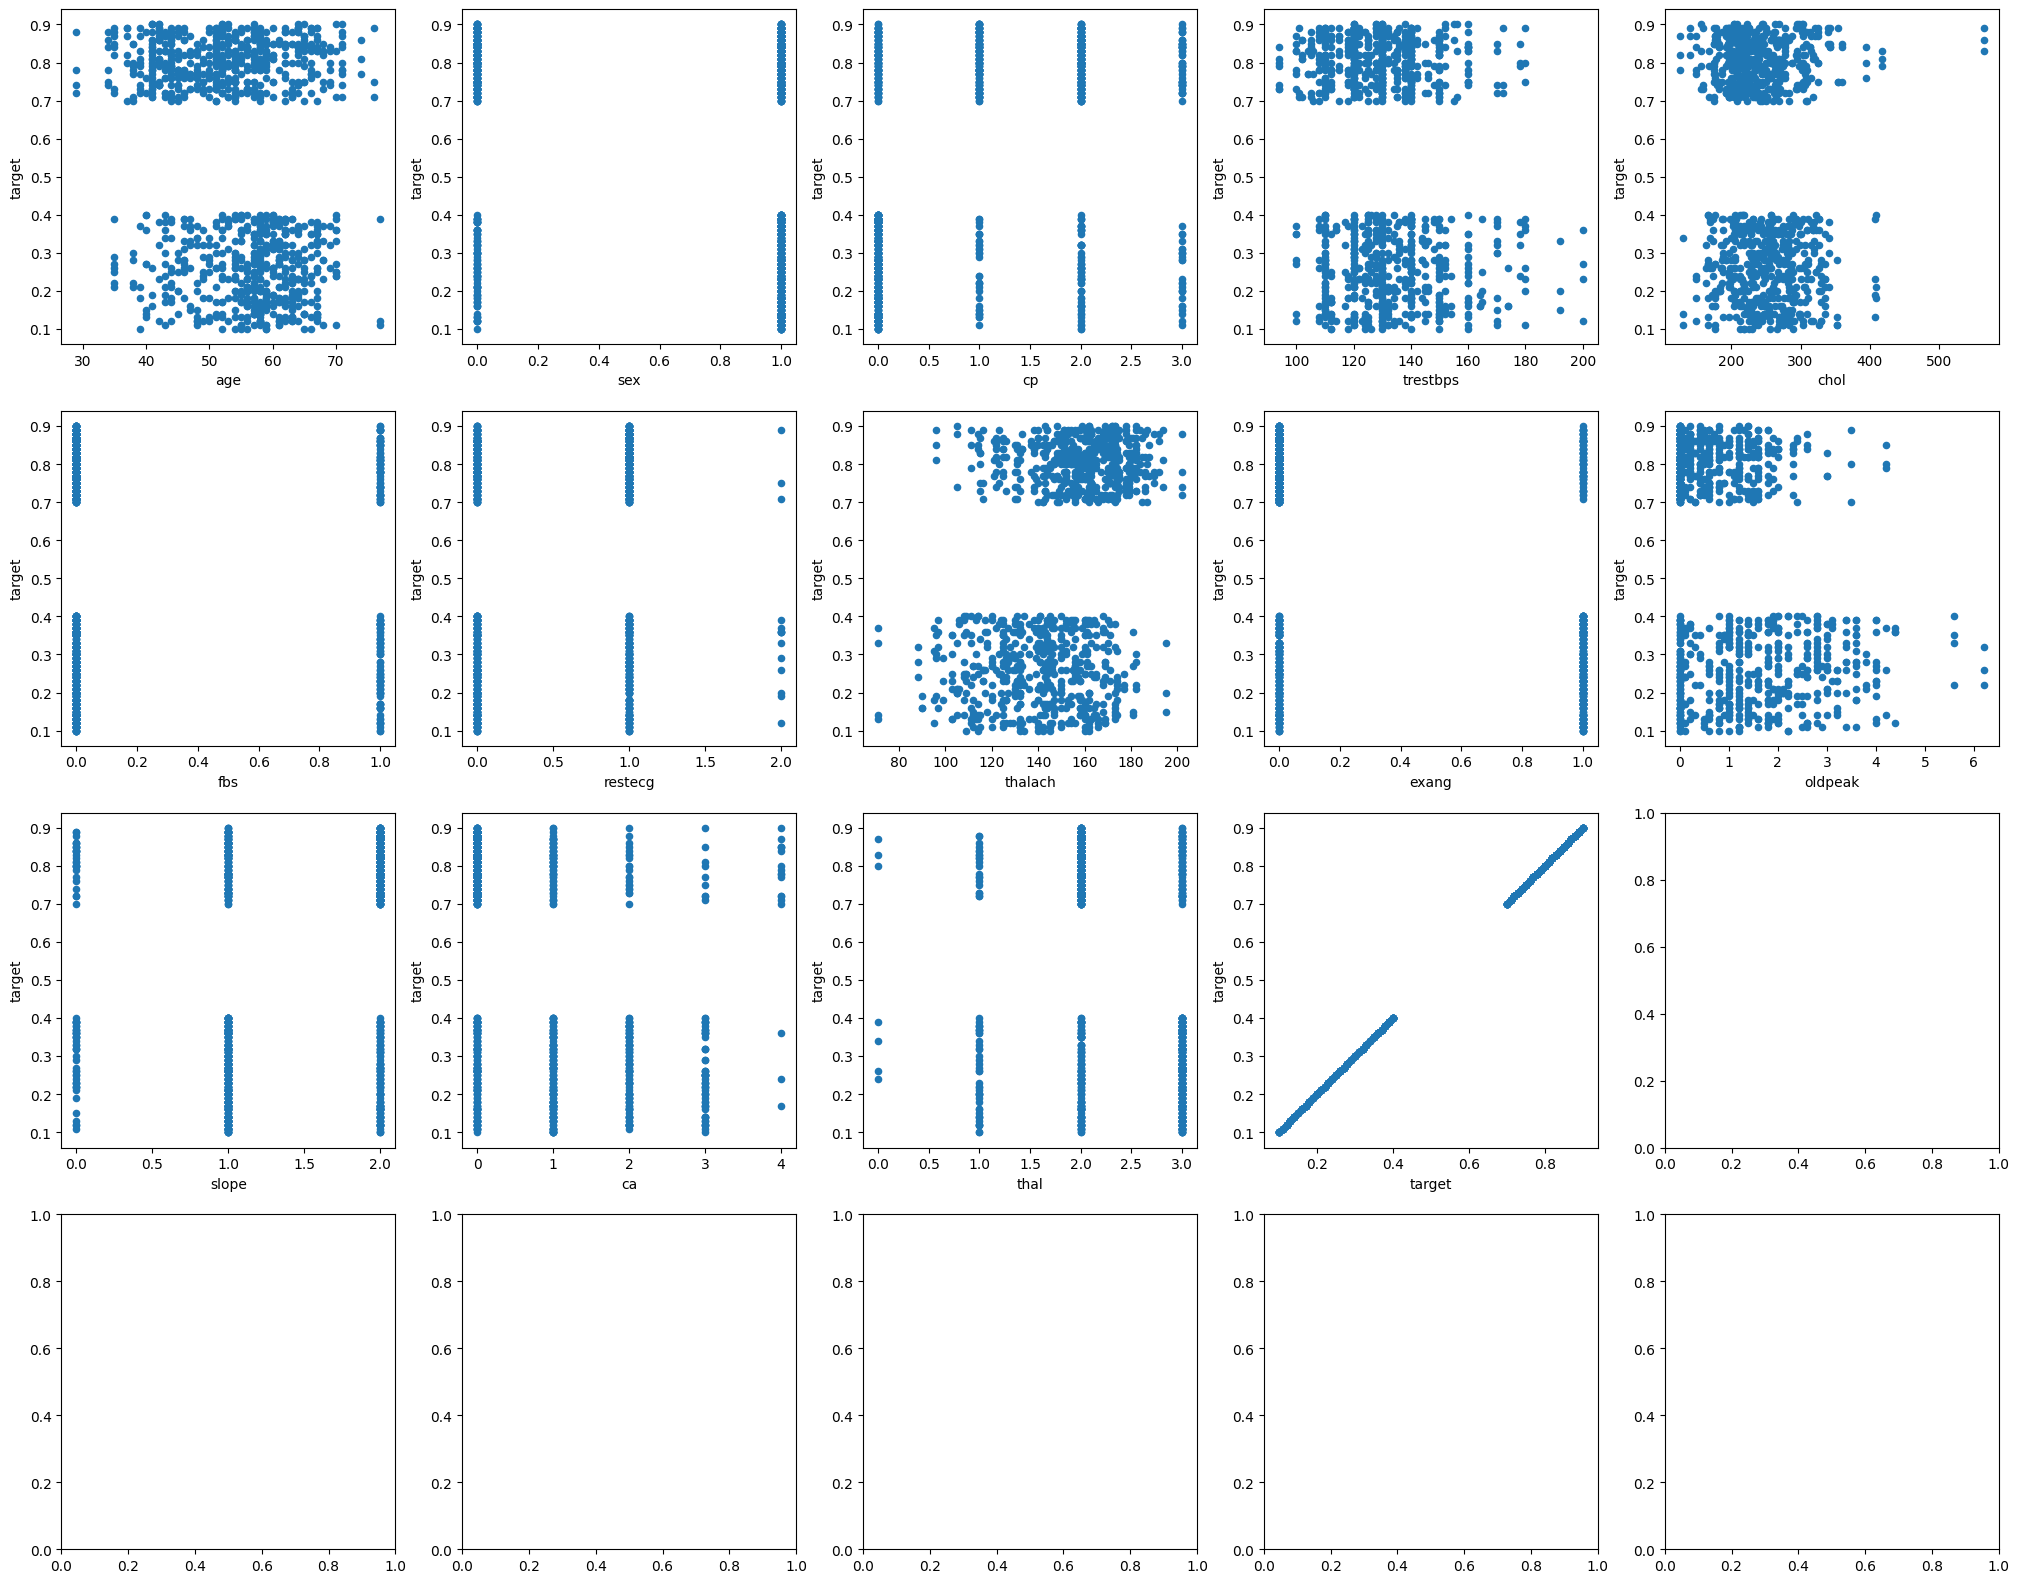

In [16]:
fig,axes = plt.subplots(nrows=4, ncols=5, figsize=(25,20))
for idx, feature in enumerate(data.columns):
  data.plot(feature, "target", subplots= True, kind='scatter', ax=axes[idx//5, idx %5])

5) Outliers - выбросы

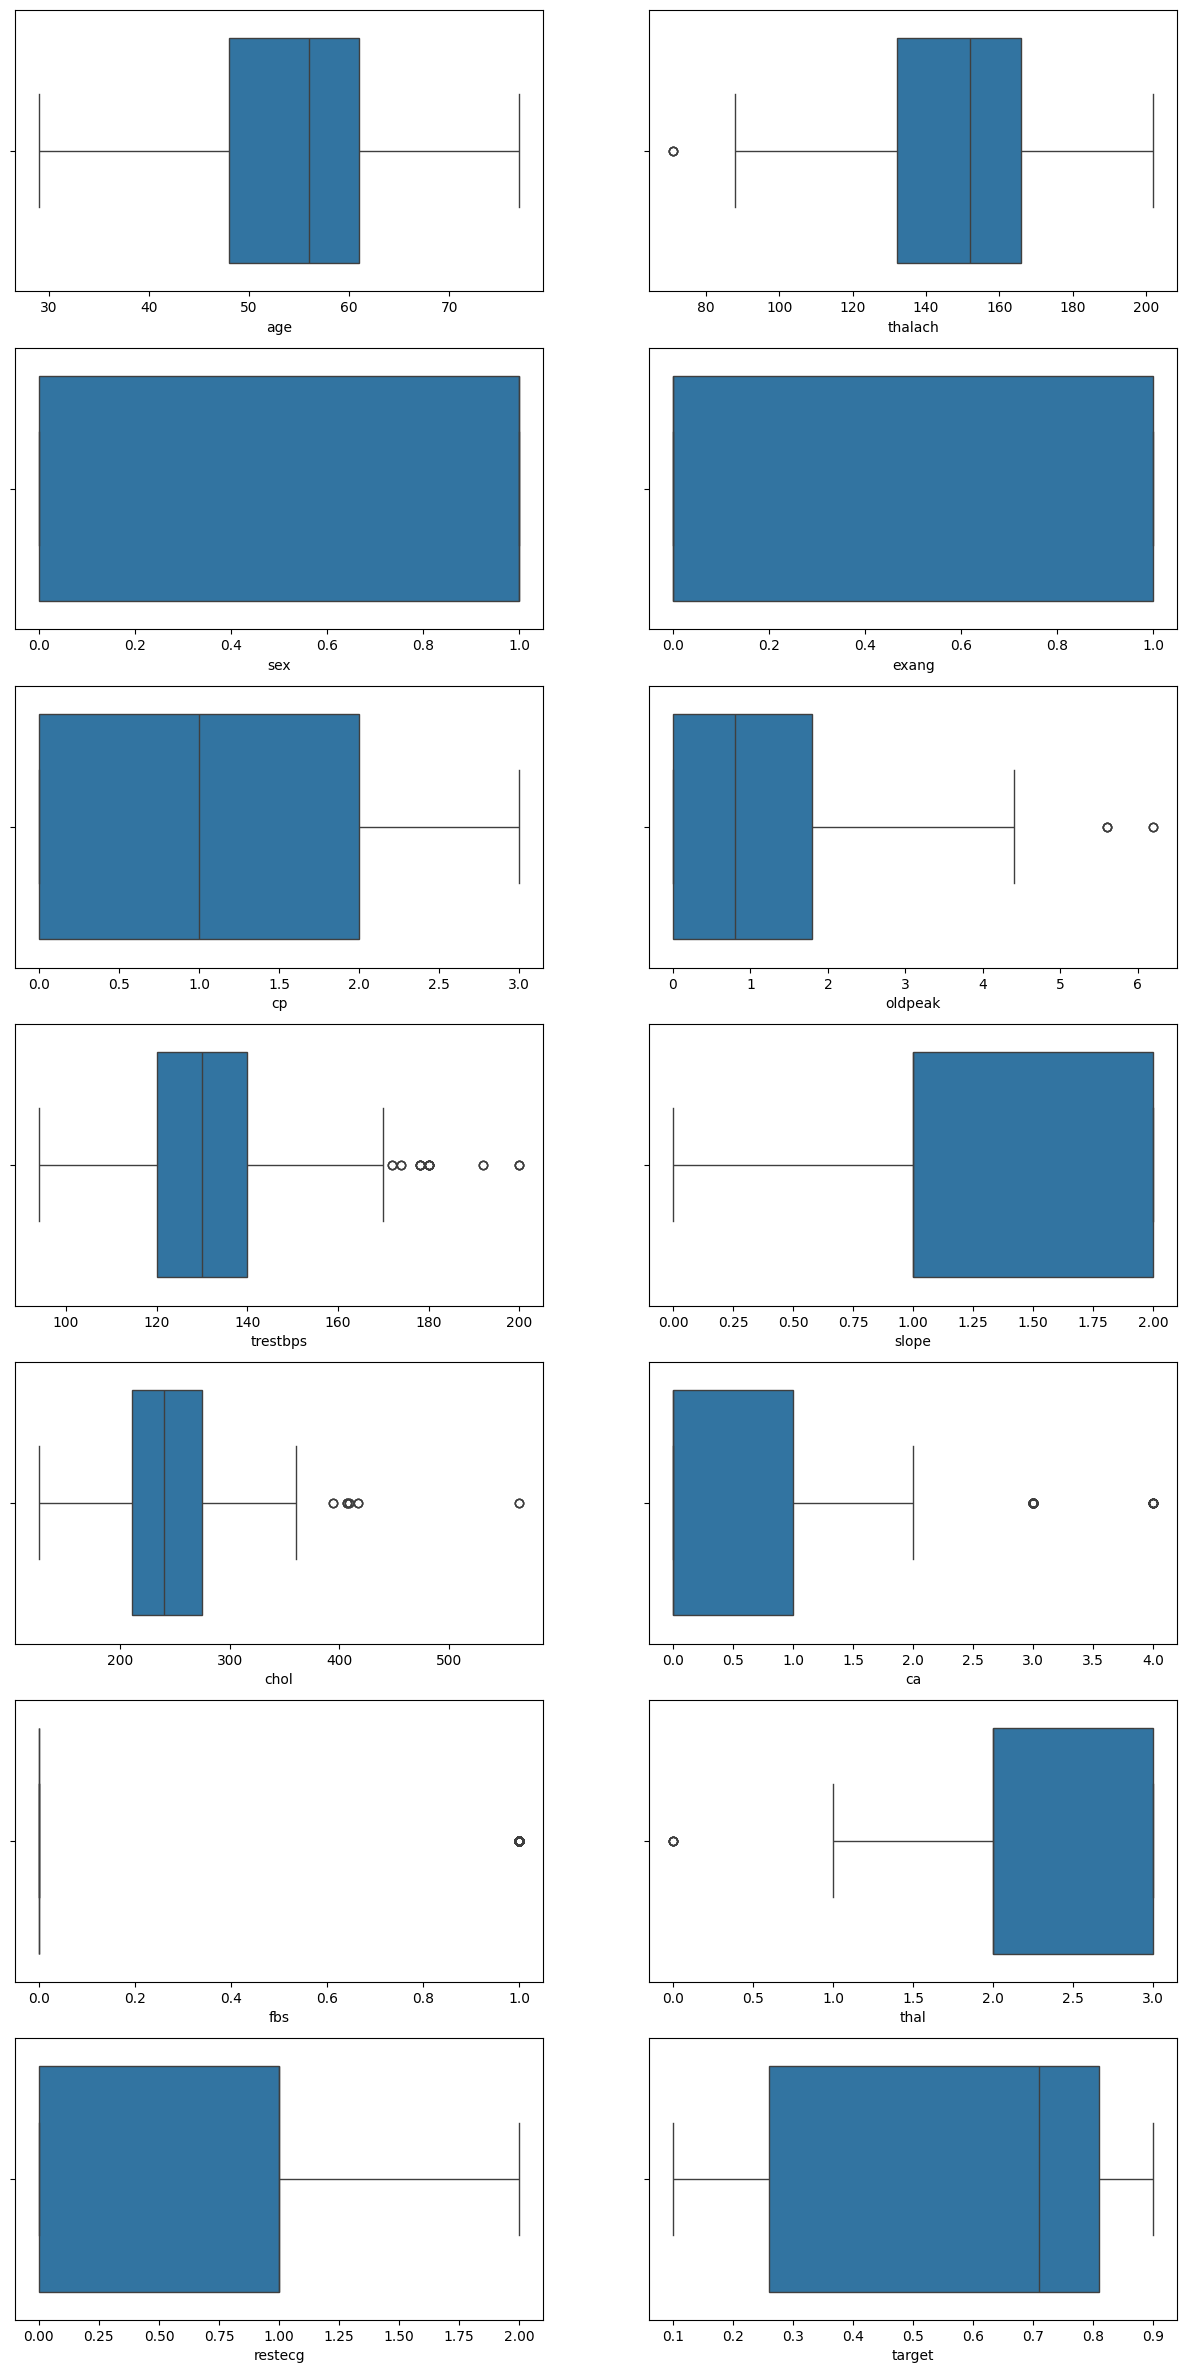

In [17]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(15,30))
count=0
for idx, feature in enumerate(data.columns[0:]):
  sns.boxplot(x=data[feature], ax=axes[count % 7, count // 7])
  count +=1

In [18]:
for col in data.columns:
  print(f'Outliers for {col} column: {boxplot_stats(data[col]).pop(0)["fliers"]}\n')

Outliers for age column: []

Outliers for sex column: []

Outliers for cp column: []

Outliers for trestbps column: [180 178 174 180 192 200 178 192 180 200 192 172 180 174 178 180 200 180
 178 180 178 174 180 200 172 180 178 178 172 180]

Outliers for chol column: [417 564 409 564 394 407 564 407 394 394 409 417 407 407 417 409]

Outliers for fbs column: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]

Outliers for restecg column: []

Outliers for thalach column: [71 71 71 71]

Outliers for exang column: []

Outliers for oldpeak column: [5.6 5.6 6.2 6.2 6.2 5.6 5.6]

Outliers for slope column: []

Outliers for ca column: [3 3 3 4 3 3 3 4 4 3 3 3 3 3 3 4 3 3 4 3 4 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 4
 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 

6) Distributions of num features

<Axes: xlabel='trestbps', ylabel='Density'>

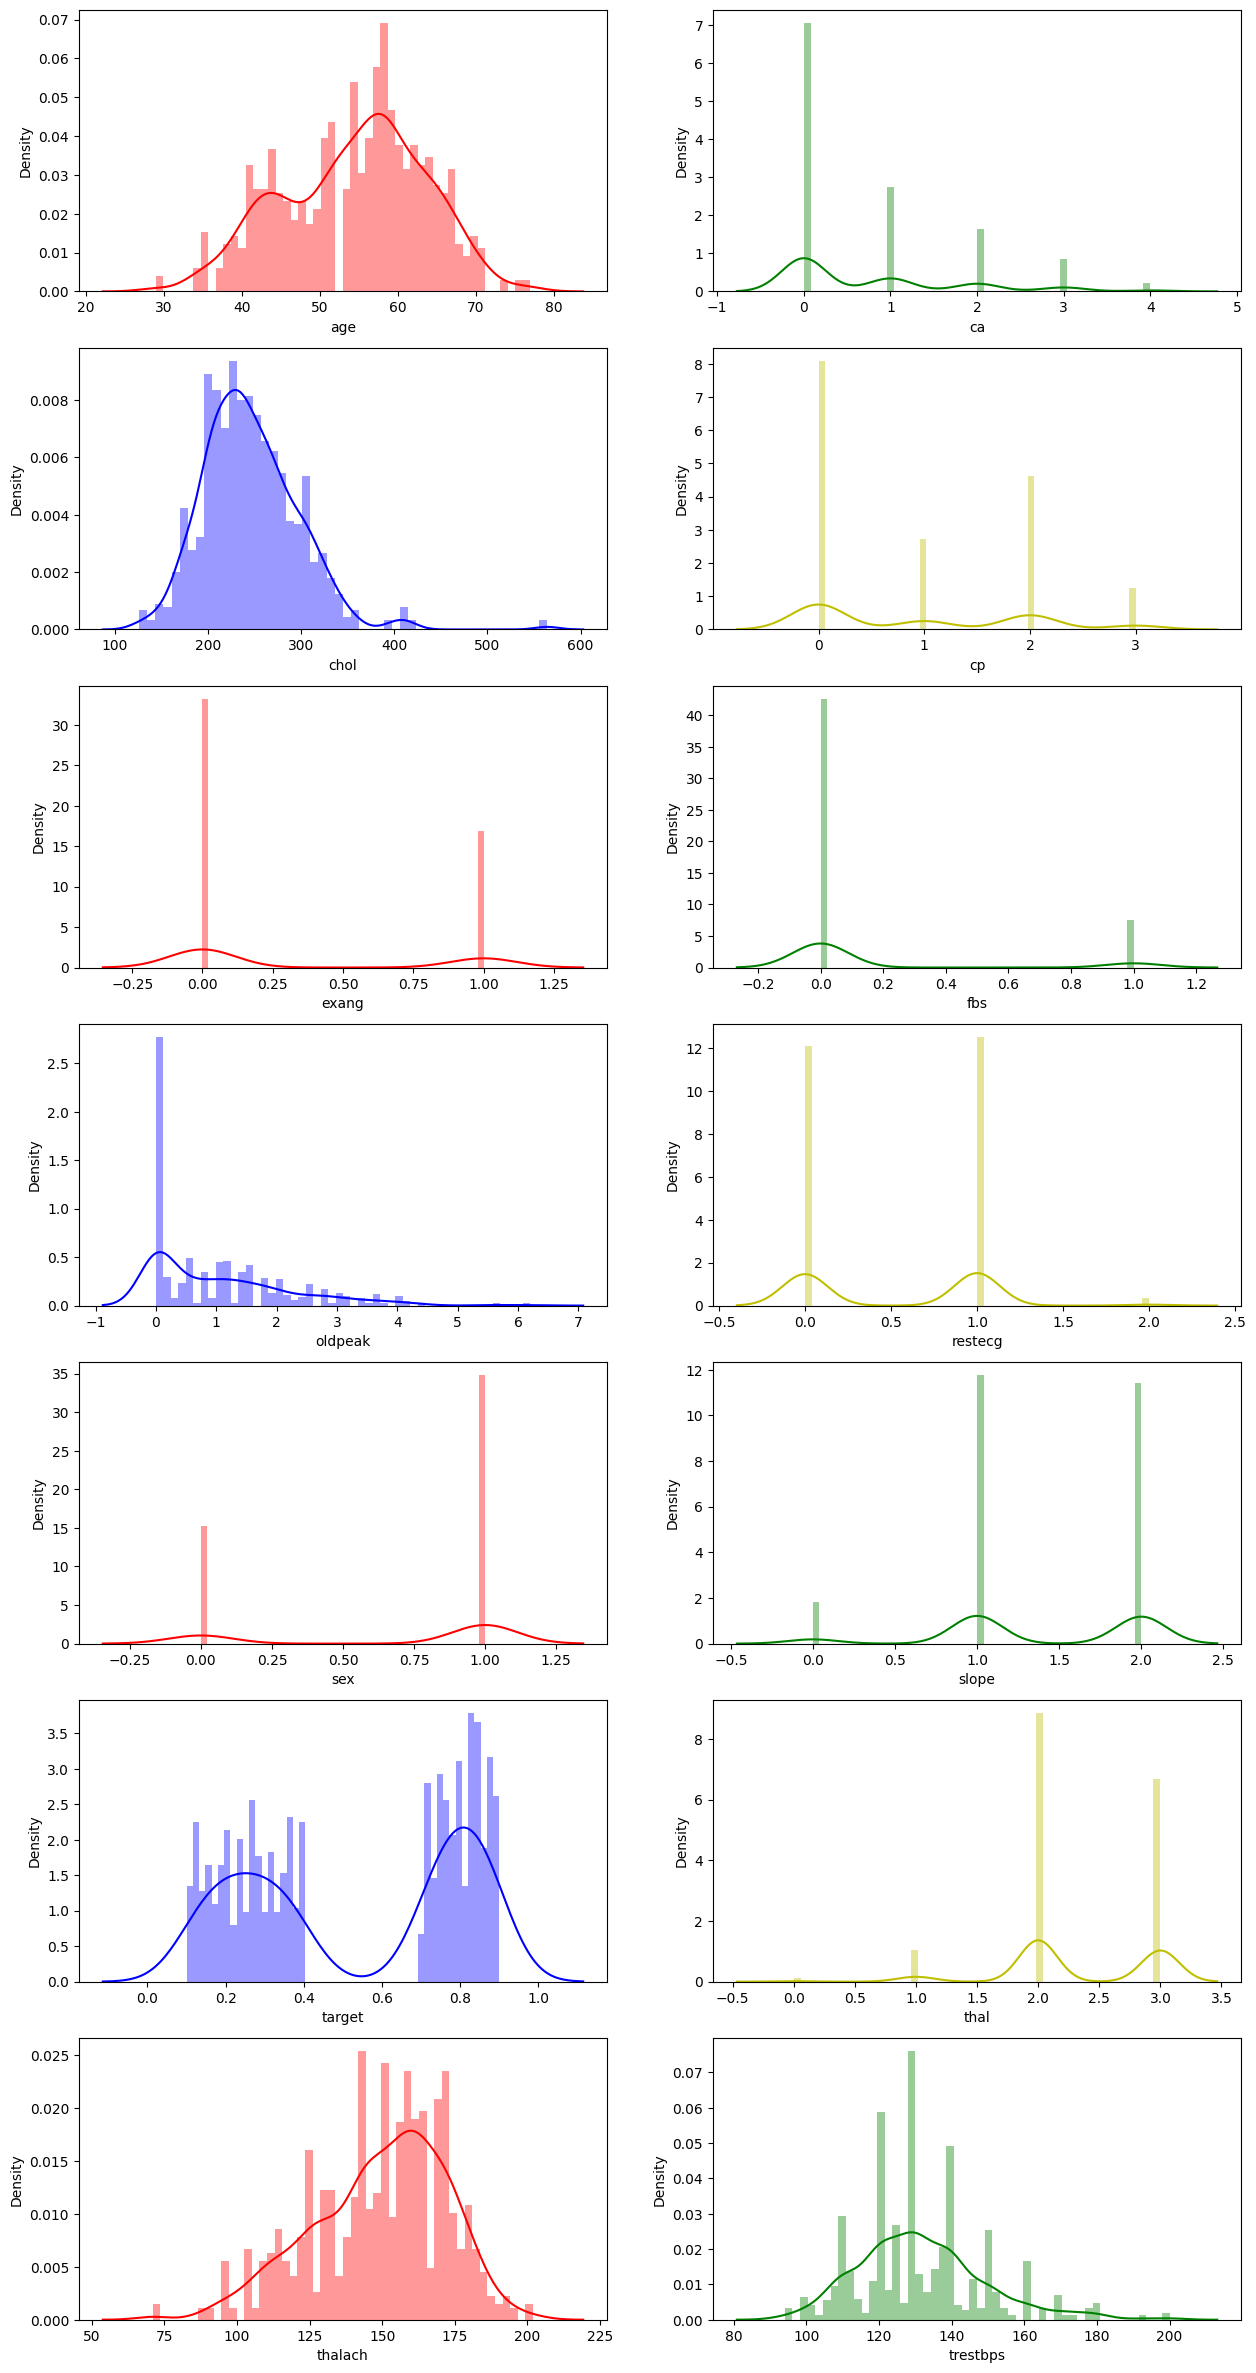

In [19]:
fig, axes = plt.subplots(7,2, figsize=(15,30))
sns.distplot(data['age'], bins=50, color='r', ax=axes[0,0])
sns.distplot(data['ca'], bins=50, color='g', ax=axes[0,1])
sns.distplot(data['chol'], bins=50, color='b', ax=axes[1,0])
sns.distplot(data['cp'], bins=50, color='y', ax=axes[1,1])
sns.distplot(data['exang'], bins=50, color='r', ax=axes[2,0])
sns.distplot(data['fbs'], bins=50, color='g', ax=axes[2,1])
sns.distplot(data['oldpeak'], bins=50, color='b', ax=axes[3,0])
sns.distplot(data['restecg'], bins=50, color='y', ax=axes[3,1])
sns.distplot(data['sex'], bins=50, color='r', ax=axes[4,0])
sns.distplot(data['slope'], bins=50, color='g', ax=axes[4,1])
sns.distplot(data['target'], bins=50, color='b', ax=axes[5,0])
sns.distplot(data['thal'], bins=50, color='y', ax=axes[5,1])
sns.distplot(data['thalach'], bins=50, color='r', ax=axes[6,0])
sns.distplot(data['trestbps'], bins=50, color='g', ax=axes[6,1])

7) Correlations

<Axes: >

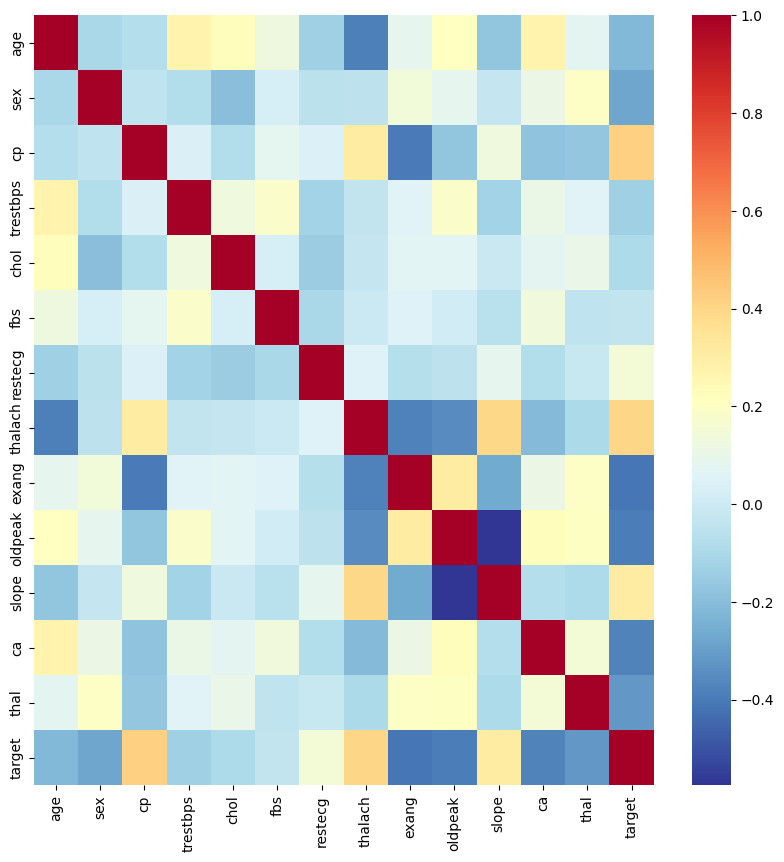

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='RdYlBu_r')

8) PCA (n_components=3)

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [22]:
scaler=StandardScaler()
df_scaled= scaler.fit_transform(data)
df_scaled[:5]

array([[-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
        -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
         0.99543334,  1.20922066,  1.08985168, -1.07248394],
       [-0.15815703,  0.66150409, -0.91575542,  0.4791073 , -0.83386117,
         2.38733039, -1.00404855,  0.2559679 ,  1.40392824,  1.72713707,
        -2.24367514, -0.73197147,  1.08985168, -0.58242998],
       [ 1.71659547,  0.66150409, -0.91575542,  0.76468824, -1.39623266,
        -0.41887792,  0.89125488, -1.04869198,  1.40392824,  1.30141672,
        -2.24367514, -0.73197147,  1.08985168, -1.03748009],
       [ 0.72407944,  0.66150409, -0.91575542,  0.93603681, -0.83386117,
        -0.41887792,  0.89125488,  0.51689988, -0.71228712, -0.91232909,
         0.99543334,  0.23862459,  1.08985168, -0.89746467],
       [ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
         2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
        -0.6241209 ,  2.17

In [23]:
df_scaled.shape

(1025, 14)

In [24]:
model =PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [25]:
def draw_3d(data):
  fig= plt.figure(figsize=(7,7))
  ax=fig.add_subplot(111, projection='3d')

  for f in data:
    ax.scatter(f[0],f[1],f[2], c='b')
  plt.show()

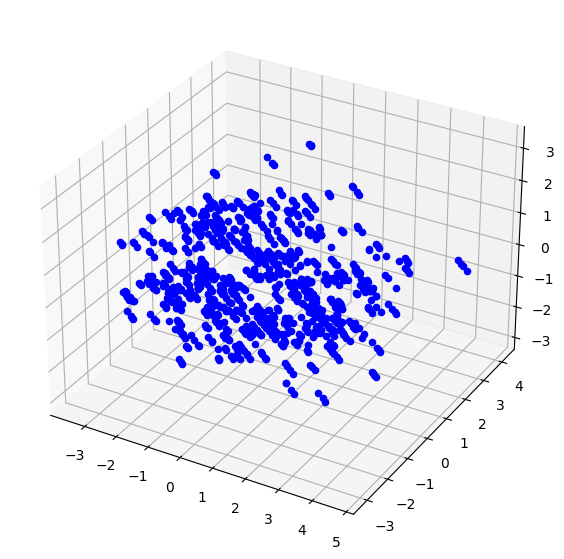

In [26]:
draw_3d(df_pca_3)

#***4) Подготовка данных***

1. Разбиение на рабочую и тестовую выборку

In [9]:
X = data.drop("target", axis = 1) #Выборка обучающая
y = data["target"] #Выборка ответеная
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
#X_train - все данные для дальнейшей работы с моделью
#Y_train - таргет-переменные для дальнейшей работы с моделью
#X_test - тестовая выборка для обучения модели
#Y_test - таргет-переменные для обучения модели


2. Распределение целевой переменной

<Axes: title={'center': 'Target density'}, ylabel='Density'>

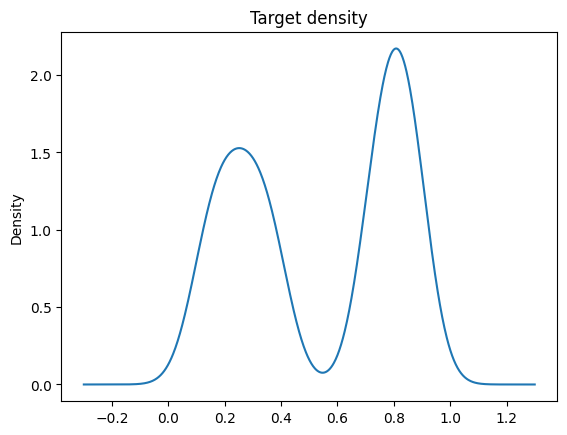

In [10]:
y.plot(kind='kde', title='Target density')

#***5) Построение и оценка качества Baseline, тестирование различных метрик***

Baseline - медиана, константное предсказание

In [11]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train,y_train)
y_preds_dummy = dummy.predict(X_test)

Обучение линейной регрессии

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

Метрика среднеквадратичная ошибка - MSE

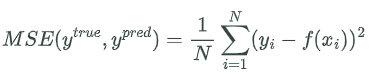

Считаем среднеквадратичную ошибку для Baseline и для линейной регрессии

In [ ]:
print(f'MSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'MSE for Linear Regression: {mean_squared_error(y_test, y_preds_lr)}')

MSE for Dummy Regressor: 0.11619494163424124
MSE for Linear Regression: 0.04787667502135639


Считаем корень из среднеквадратичной ошибки для Baseline и для линейной регрессии - более интерпретируемая информация

In [ ]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'RMSE for Linear Regression: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE for Dummy Regressor: 0.3408737913572137
RMSE for Linear Regression: 0.21880739251989725


Построение Scaterrplot для оценки моделей на графиках

In [13]:
def plot_model_results(actual,predicted,title):
  results = pd.DataFrame({'True': actual,'Prediction':predicted})
  sns.lmplot(x='True', y='Prediction', data=results,fit_reg=False)
  d_line = np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color = 'red', linestyle = '--')
  plt.title = title
  plt.grid()
  plt.show()

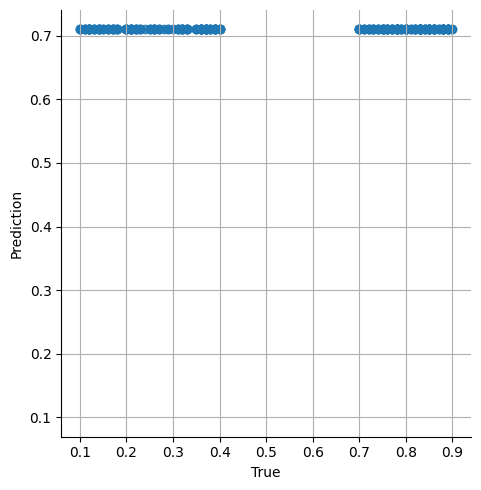

In [14]:
plot_model_results(y_test, y_preds_dummy, title = 'Dummy')

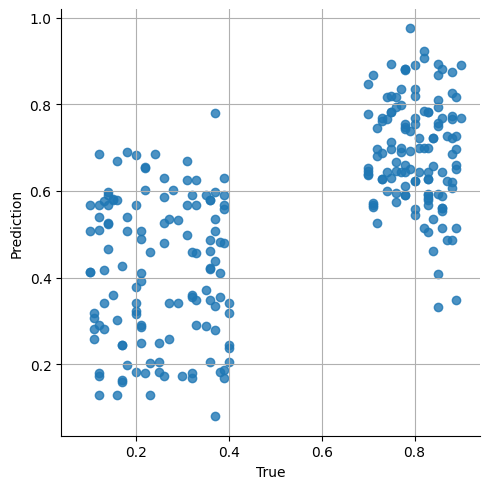

In [15]:
plot_model_results(y_test, y_preds_lr, title = 'Linear Regression')

***MAE - абсолютная ошибка***

Для уменьшения чувствительности к выбросам можно использовать MAE

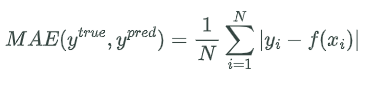

In [16]:
print(f'MAE for Dummy Regressor: {mean_absolute_error(y_test, y_preds_dummy)}')
print(f'MAE for Linear Regression: {mean_absolute_error(y_test, y_preds_lr)}')

MAE for Dummy Regressor: 0.27731517509727627
MAE for Linear Regression: 0.17466281294405653


***MAPE***

MSE и MAE считают абсолютную ошибку, однако бывает полезно посчитать относительную, например, в процентах

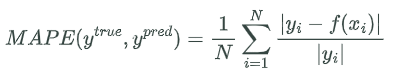

In [17]:
print(f'MAPE for Dummy Regressor: {mean_absolute_percentage_error(y_test, y_preds_dummy)}')
print(f'MAPE for Linear Regression: {mean_absolute_percentage_error(y_test, y_preds_lr)}')

MAPE for Dummy Regressor: 1.2491836211510876
MAPE for Linear Regression: 0.6362342224473383


Почему ошибка 120 %?

***Коэффициент детерминации***

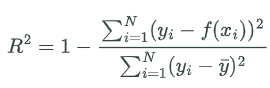

Коэффициент детерминации показывает, какая доля дисперсии таргетов (знаменатель) объяснена моделью. У идеальных предсказаний равен 1, у лучшего константного предсказания он равен  0 на обучающей выборке.

In [ ]:
print(f'MAPE for Dummy Regressor: {r2_score(y_test, y_preds_dummy)}')
print(f'MAPE for Linear Regression: {r2_score(y_test, y_preds_lr)}')

MAPE for Dummy Regressor: -0.40634613866477864
MAPE for Linear Regression: 0.4205326316154253


#***6) Выбор метрики и обоснование***

Для данного датасета выбираю метрики: 1) Коэффициент детерминации, чтобы понять насколько точно предсказания вероятностей заболевания соответствуют модели.
2) RMSE